Logistic Regression Analysis for the Wine Dataset

In [5]:
pip install ucimlrepo

In [6]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.4 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [10]:
df = pd.concat([X, y], axis = 1)
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [11]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [12]:
df.head(20)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [34]:
missing_values = df.isnull().sum()
print(missing_values)

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64


In [35]:
summary_statistics = df.describe()
print(summary_statistics)

          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

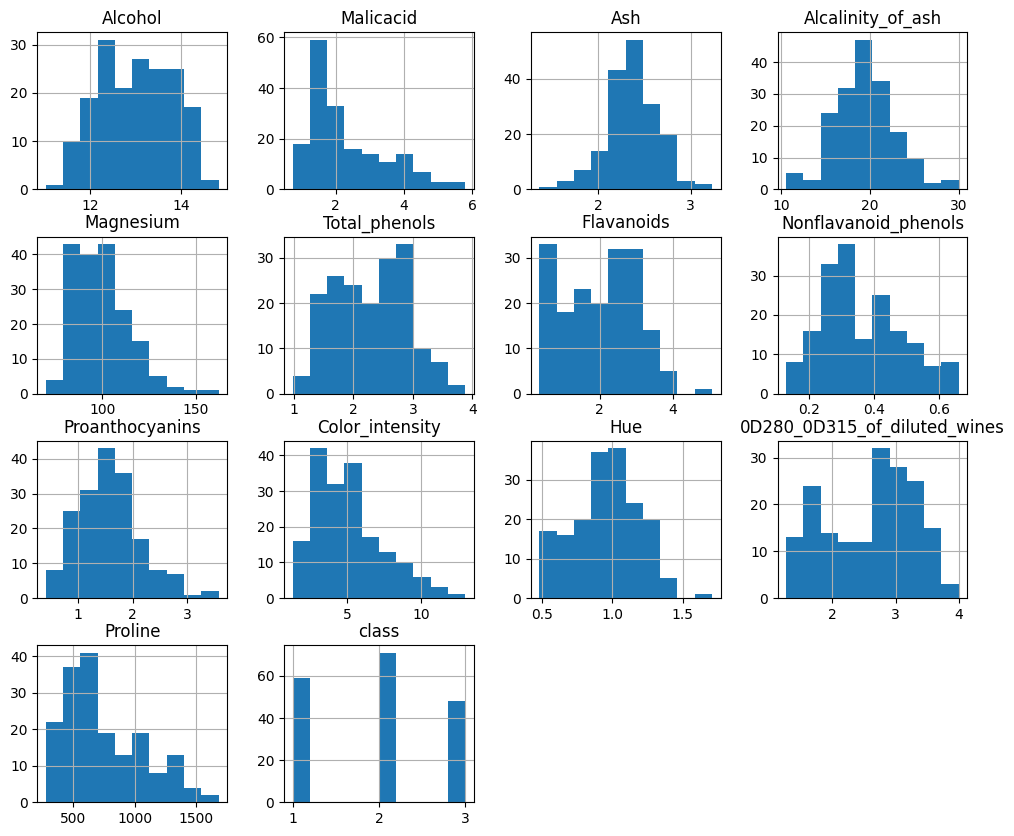

In [36]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10))
plt.show()

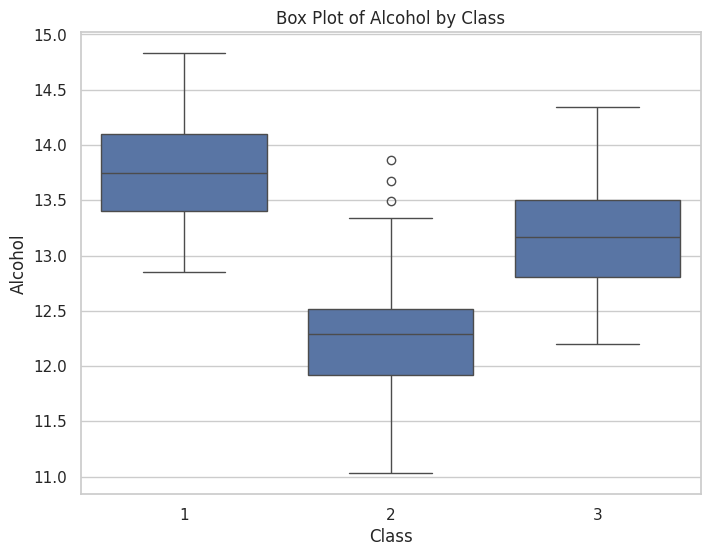

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='Alcohol', data=df)
plt.title('Box Plot of Alcohol by Class')
plt.xlabel('Class')
plt.ylabel('Alcohol')
plt.show()

In [38]:
correlation_matrix = df.corr()
print(correlation_matrix)

                               Alcohol  Malicacid       Ash  \
Alcohol                       1.000000   0.094397  0.211545   
Malicacid                     0.094397   1.000000  0.164045   
Ash                           0.211545   0.164045  1.000000   
Alcalinity_of_ash            -0.310235   0.288500  0.443367   
Magnesium                     0.270798  -0.054575  0.286587   
Total_phenols                 0.289101  -0.335167  0.128980   
Flavanoids                    0.236815  -0.411007  0.115077   
Nonflavanoid_phenols         -0.155929   0.292977  0.186230   
Proanthocyanins               0.136698  -0.220746  0.009652   
Color_intensity               0.546364   0.248985  0.258887   
Hue                          -0.071747  -0.561296 -0.074667   
0D280_0D315_of_diluted_wines  0.072343  -0.368710  0.003911   
Proline                       0.643720  -0.192011  0.223626   
class                        -0.328222   0.437776 -0.049643   

                              Alcalinity_of_ash  Magne

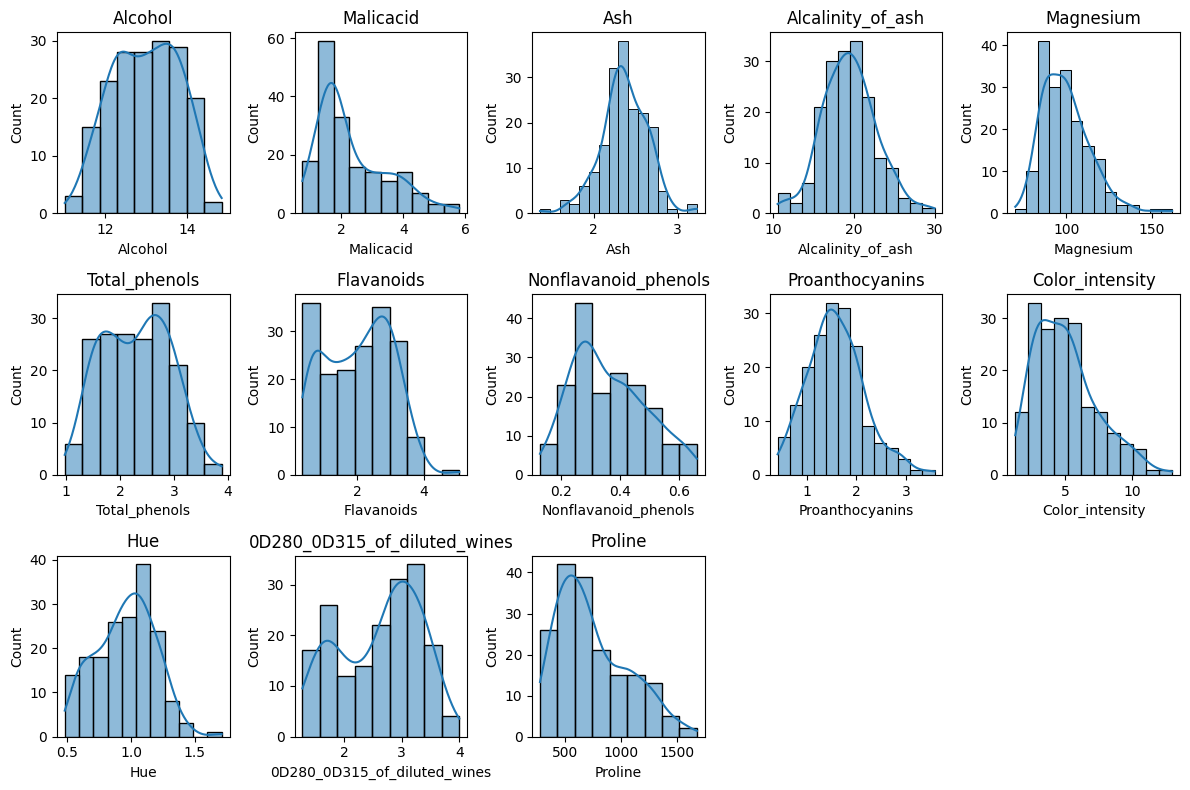

In [32]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

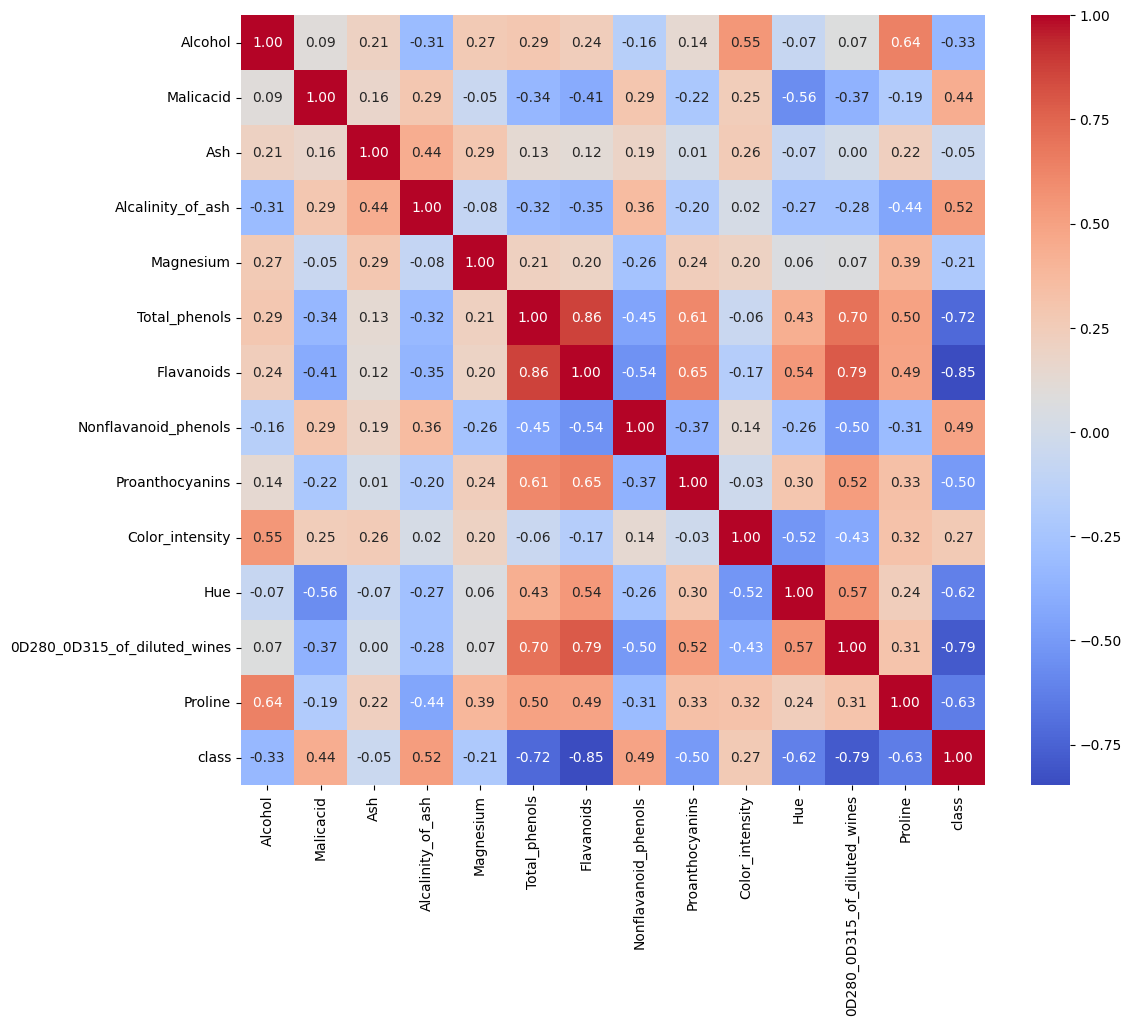

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [40]:
class_distribution = df['class'].value_counts()
print(class_distribution)

class
2    71
1    59
3    48
Name: count, dtype: int64


Class 2 is the most popular, Class 1 comes next, and Class 3 is the least common among the three types

In [46]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)


                         Feature  Coefficient
6                     Flavanoids     0.931024
2                            Ash     0.823180
11  0D280_0D315_of_diluted_wines     0.479091
1                      Malicacid     0.354056
9                Color_intensity     0.143029
5                  Total_phenols     0.114470
7           Nonflavanoid_phenols     0.067620
12                       Proline     0.008603
4                      Magnesium    -0.016505
8                Proanthocyanins    -0.045146
10                           Hue    -0.146752
0                        Alcohol    -0.295785
3              Alcalinity_of_ash    -0.321011


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logistic_reg = LogisticRegression(max_iter=10000)

k = 5
cv_scores = cross_val_score(logistic_reg, X_scaled, y, cv=k)

print("Average cross-validation score:", cv_scores.mean())






Average cross-validation score: 0.9888888888888889


## Comments
* model predicts classes with an accuracy of 98.9%. This high accuracy means model performs well
* The model resulted an accuracy of 0.97
* 0D280_0D315_of_diluted_wines have the highest positive coefficients( a high value of feature means a higher chance of belonging to those classes.)
* Alcohol and Alcalinity_of_ash have negative coefficients, indicating a negative impact on predicting the wine classes. This means that there is a lower probability of it being associated to a certain wine. (For example, wines with higher alcohol content might be less likely to belong to a particular class compared to wines with lower alcohol content.)
* Class 2: It's the most common type in your data, with 71 instances.
* Class 1: It's also common but less than Class 2, with 59 instances.
* Class 3: It's the least common, with only 48 instances.